# Word2Vec con "Harry Potter and the Prisoner of Azkaban"
Este análisis tiene los siguientes objetivos:
- Crear embeddings Word2Vec usando Gensim.
- Probar términos de interés y explicar similitudes.
- Graficar en 2D los embeddings seleccionados.
- Sacar conclusiones sobre las relaciones semánticas.


## 1. Importar librerias

In [9]:
import pandas as pd
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


## 2. Cargar el libro

In [11]:
import pandas as pd

# Cargar el texto
with open("HP_books/03 Harry Potter and the Prisoner of Azkaban.txt", "r", encoding="utf-8") as file:
    text = file.read()

# Separar en "oraciones" por líneas
sentences = text.splitlines()
sentences = [s for s in sentences if s.strip() != ""]

df = pd.DataFrame(sentences, columns=["sentence"])
df.head()


,sentence
0,Harry Potter was a highly unusual boy in many ...
1,"It was nearly midnight, and he was lying on hi..."
2,The quill paused at the top of a likely-lookin...
3,Non-magic people (more commonly known as Muggl...
4,Harry put his quill between his teeth and reac...


## 3. Tokenizar

In [12]:
from tensorflow.keras.preprocessing.text import text_to_word_sequence

# Tokenización de cada oración
tokenized_sentences = [text_to_word_sequence(sentence) for sentence in df["sentence"]]
tokenized_sentences[:5]


[['harry',
  'potter',
  'was',
  'a',
  'highly',
  'unusual',
  'boy',
  'in',
  'many',
  'ways',
  'for',
  'one',
  'thing',
  'he',
  'hated',
  'the',
  'summer',
  'holidays',
  'more',
  'than',
  'any',
  'other',
  'time',
  'of',
  'year',
  'for',
  'another',
  'he',
  'really',
  'wanted',
  'to',
  'do',
  'his',
  'homework',
  'but',
  'was',
  'forced',
  'to',
  'do',
  'it',
  'in',
  'secret',
  'in',
  'the',
  'dead',
  'of',
  'night',
  'and',
  'he',
  'also',
  'happened',
  'to',
  'be',
  'a',
  'wizard'],
 ['it',
  'was',
  'nearly',
  'midnight',
  'and',
  'he',
  'was',
  'lying',
  'on',
  'his',
  'front',
  'in',
  'bed',
  'the',
  'blankets',
  'drawn',
  'right',
  'over',
  'his',
  'head',
  'like',
  'a',
  'tent',
  'a',
  'torch',
  'in',
  'one',
  'hand',
  'and',
  'a',
  'large',
  'leather',
  'bound',
  'book',
  'a',
  'history',
  'of',
  'magic',
  'by',
  'adalbert',
  'waffling',
  'propped',
  'open',
  'against',
  'the',
  'pil

## 4. Entrenar modelo Word2Vec

In [13]:

# Entrenar modelo Word2Vec
model = Word2Vec(sentences=tokenized_sentences, vector_size=100, window=5, min_count=2, workers=4, seed=42)

# Guardar vocabulario
words = list(model.wv.index_to_key)
print("Palabras en el vocabulario:", len(words))
print("Ejemplo:", words[:10])


Palabras en el vocabulario: 4754
Ejemplo: ['the', '’', 'and', 'to', 'a', 'of', 'harry', 'he', 'was', 'his']


## 5. Palabras similares

In [14]:
# Probar similitud entre palabras
model.wv.most_similar("harry", topn=5)


[('hermione', 0.9990105628967285),
 ('looking', 0.997895359992981),
 ('hagrid', 0.9977991580963135),
 ('snape', 0.9973818063735962),
 ('who', 0.9971451163291931)]

## 6.  Visualizar con PCA


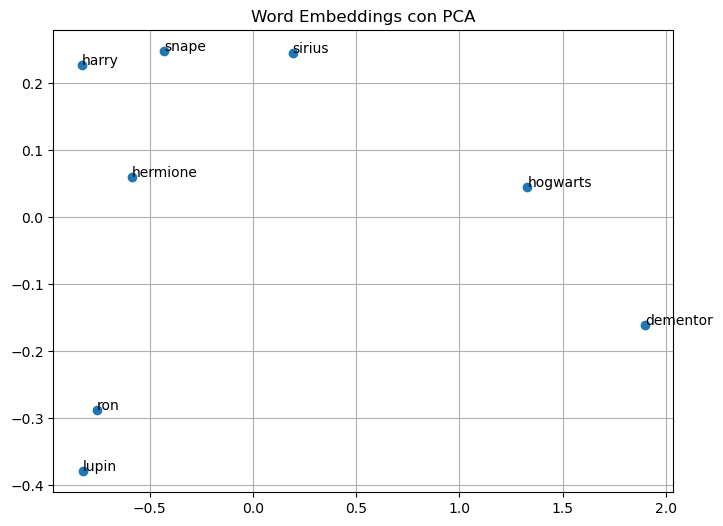

In [15]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Tomar un subconjunto de palabras
selected_words = ["harry", "ron", "hermione", "snape", "dementor", "lupin", "hogwarts", "sirius"]
vectors = [model.wv[word] for word in selected_words]

# Reducción de dimensionalidad
pca = PCA(n_components=2)
result = pca.fit_transform(vectors)

# Graficar
plt.figure(figsize=(8, 6))
plt.scatter(result[:, 0], result[:, 1])

for i, word in enumerate(selected_words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))

plt.title("Word Embeddings con PCA")
plt.grid(True)
plt.show()


## Conclusiones
1. Agrupamiento semántico:

Harry, hermione, ron y lupin están ubicados en el mismo cuadrante (izquierda), lo cual refleja cierta cercanía semántica en el texto. Esto tiene sentido, ya que todos están en el "bando bueno" y tienen múltiples interacciones.

snape y sirius están en la parte superior cerca de harry, indicando relaciones fuertes aunque más complejas o ambivalentes. Es coherente porque tienen un vínculo pasado con los padres de Harry.

2. Personajes periféricos o "externos":

Dementor está completamente desplazado hacia la derecha, lo que indica que su contexto lingüístico es bastante distinto. Esto también es lógico: los dementores aparecen en escenas de peligro y miedo, no en contextos de diálogo casual o escolar.

hogwarts, aunque central como lugar, aparece un poco más aislado, lo cual puede reflejar su rol como entorno más que como agente activo.

3. Diferencias de contexto:

Lupin está algo separado hacia el sur, lo cual puede sugerir que sus interacciones tienen un tono diferente o aparecen en contextos únicos (como su transformación o sus clases).

Relaciones posibles:

harry es un nodo cercano a sirius y snape, lo cual representa su importancia en la trama y su conexión directa con ambos personajes.
